# Основы сверточных нейронных сетей

1. Введение в сверточные нейронные сети (CNN, convolutional neural networks)

- Основные концепции: свертка, пулинг, активационные функции.
- Как CNNs применяются для компьютерного зрения.

**Теоретические аспекты:**
- **Свертка**: Принцип работы, фильтры (kernels), свертка иерархий признаков.
- **Пулинг**: Max-pooling, average pooling — для уменьшения размерности и улучшения инвариантности.
- **Активационные функции**: ReLU, Sigmoid, и другие, как они добавляют нелинейность.
- **Архитектура CNN**: Структура слоев в сверточных нейронных сетях (сверточные слои, пулинг, fully-connected слои).



## 1. Слои

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import torchvision


In [2]:
def tensor_info(tensor):
    print(f'Размер тензора: {tensor.shape}')
    print(f'Тип данных элементов тензора: {tensor.dtype}')
    print(f'Максимальный элемент: {tensor.max()}')
    print(f'Минимальный элемент: {tensor.min()}')
    print(f'Тип данных тензора: {type(tensor)}')

### Полносвязный слой

In [6]:
test_layer = nn.Linear(in_features=6, out_features=3, bias=True) 

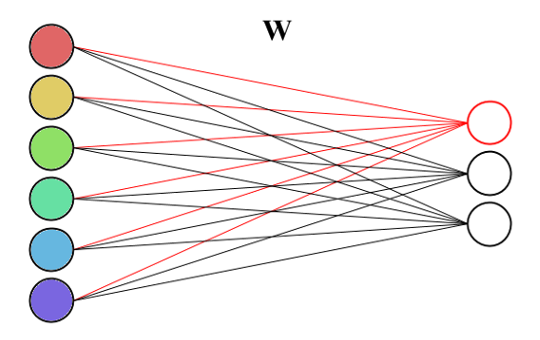
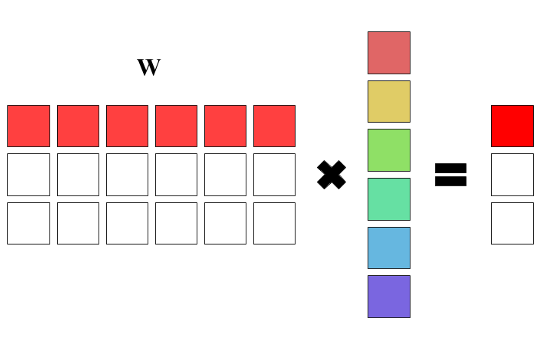

In [7]:
test_layer.weight, test_layer.bias

(Parameter containing:
 tensor([[ 0.3935, -0.2173,  0.0296,  0.3801, -0.1326,  0.2923],
         [-0.2618,  0.0994,  0.2898, -0.3567,  0.2585,  0.0367],
         [-0.0590, -0.0359, -0.3840,  0.0763,  0.2372, -0.0560]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.1291,  0.2347,  0.3297], requires_grad=True))

In [8]:
x = torch.tensor([1,2,3,4,5,6], dtype=torch.float32)
print(x)

tensor([1., 2., 3., 4., 5., 6.])


In [9]:
y = test_layer(x)
print(y)

tensor([2.5305, 1.1263, 0.2021], grad_fn=<ViewBackward0>)


### Сверточные слои

In [12]:
test_convlayer = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3, stride=1, padding=1)        

![Screenshot from 2024-10-13 17-42-06.png](<attachment:Screenshot from 2024-10-13 17-42-06.png>)
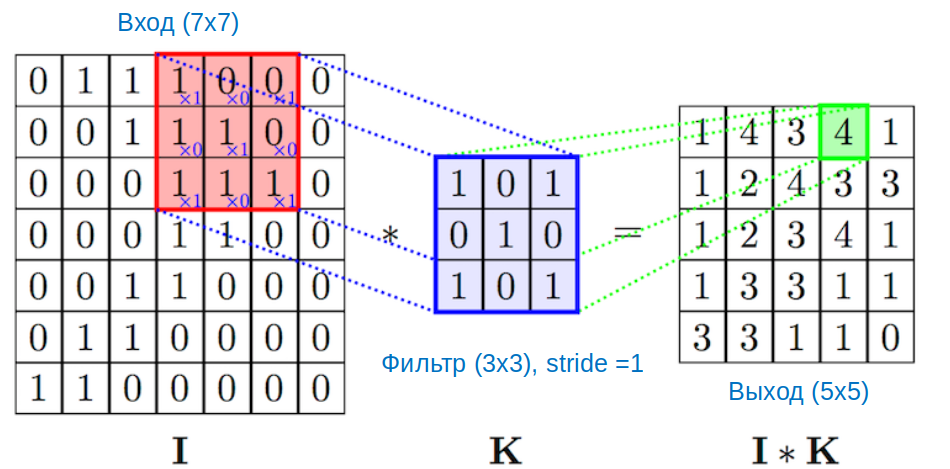

In [11]:
test_convlayer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3,3), stride=(1,1), padding=0)
                # nn.Conv1d
                # nn.Conv3d

In [12]:
test_convlayer.weight, test_convlayer.bias

(Parameter containing:
 tensor([[[[ 0.2534, -0.2199,  0.1515],
           [ 0.0981, -0.3121, -0.0640],
           [ 0.0466, -0.1306,  0.1748]]]], requires_grad=True),
 Parameter containing:
 tensor([0.1703], requires_grad=True))

tensor([[0., 1., 1., 0., 0., 1., 0.],
        [0., 1., 1., 1., 0., 1., 1.],
        [1., 1., 0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 0.],
        [0., 0., 1., 0., 1., 0., 1.],
        [1., 1., 0., 1., 0., 1., 0.]]) torch.Size([7, 7])


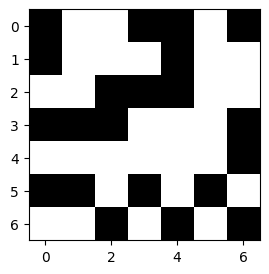

In [15]:
x = torch.randint(0, 2, (7,7))
x = x.type(torch.float32)

print(x, x.shape)
plt.figure(figsize=(3, 3))
plt.imshow(x, cmap='gray')

In [16]:
x = x.unsqueeze(0)
print(x, x.shape)

tensor([[[0., 1., 1., 0., 0., 1., 0.],
         [0., 1., 1., 1., 0., 1., 1.],
         [1., 1., 0., 0., 0., 1., 1.],
         [0., 0., 0., 1., 1., 1., 0.],
         [1., 1., 1., 1., 1., 1., 0.],
         [0., 0., 1., 0., 1., 0., 1.],
         [1., 1., 0., 1., 0., 1., 0.]]]) torch.Size([1, 7, 7])


tensor([[[-0.3581, -0.0274,  0.2098,  0.5308, -0.3813],
         [-0.1120,  0.6283,  0.2481,  0.6021, -0.3581],
         [ 0.2947,  0.4506, -0.1149,  0.1347, -0.1960],
         [ 0.0673, -0.0867,  0.0455, -0.0532,  0.2114],
         [ 0.2074,  0.2647,  0.2589,  0.2647,  0.1074]]],
       grad_fn=<SqueezeBackward1>)


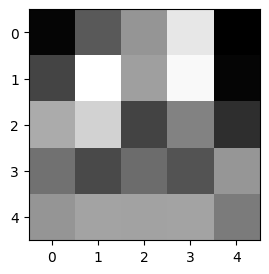

In [17]:
y = test_convlayer(x)
# test_convlayer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3,3), stride=(1,1), padding=0)

print(y)
plt.figure(figsize=(3, 3))
plt.imshow(y.detach().numpy()[0], cmap='gray')

### Обработка многоканальных карт (изображений)

![Screenshot from 2024-10-13 17-37-00.png](<attachment:Screenshot from 2024-10-13 17-37-00.png>)
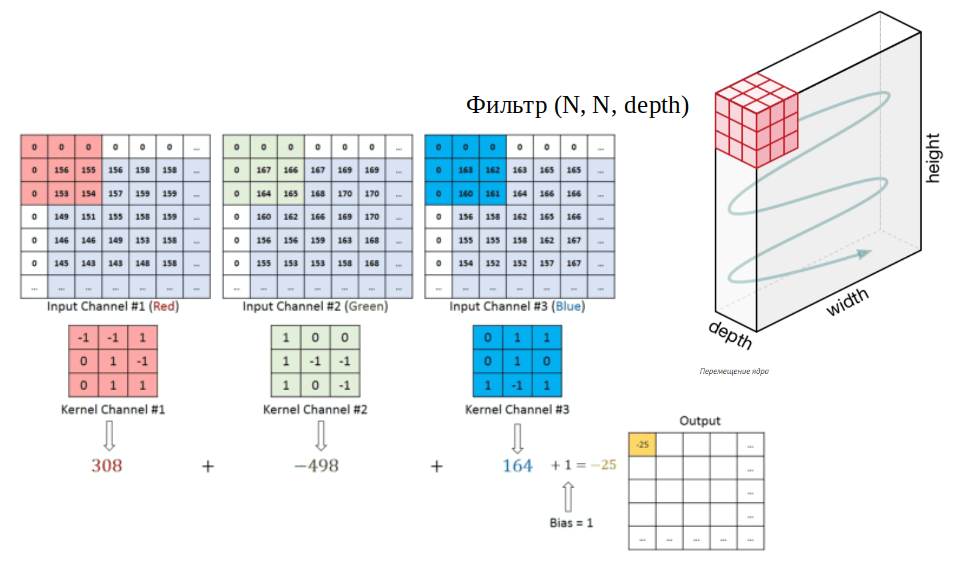

In [20]:
test_convlayer = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, stride=(1,1), padding=1)

In [21]:
test_convlayer.weight, test_convlayer.bias

(Parameter containing:
 tensor([[[[-0.1477,  0.0143, -0.0734],
           [-0.0982, -0.1652,  0.0712],
           [ 0.1126,  0.0942, -0.1506]],
 
          [[ 0.0440, -0.0083, -0.1780],
           [ 0.1896, -0.0625,  0.1123],
           [ 0.0755, -0.0699,  0.1008]],
 
          [[ 0.0782, -0.0274, -0.1056],
           [-0.0443,  0.1341,  0.0398],
           [ 0.1769,  0.1710,  0.0157]]]], requires_grad=True),
 Parameter containing:
 tensor([0.0828], requires_grad=True))

In [22]:
test_convlayer.weight.shape

torch.Size([1, 3, 3, 3])

In [23]:
# Загружаем изображение
img = torchvision.io.read_image('./cat.jpg')
img = img.type(torch.float32)

tensor_info(img)

Размер тензора: torch.Size([3, 360, 543])
Тип данных элементов тензора: torch.float32
Максимальный элемент: 255.0
Минимальный элемент: 0.0
Тип данных тензора: <class 'torch.Tensor'>


In [24]:
from torchvision import transforms

tr = transforms.Compose([
    # transforms.ToTensor(),
    # transforms.Normalize(0, 255),
    transforms.Resize(256, antialias=False),
    transforms.CenterCrop(256)
])

In [25]:
img = tr(img)
tensor_info(img)

Размер тензора: torch.Size([3, 256, 256])
Тип данных элементов тензора: torch.float32
Максимальный элемент: 255.0
Минимальный элемент: 0.0
Тип данных тензора: <class 'torch.Tensor'>


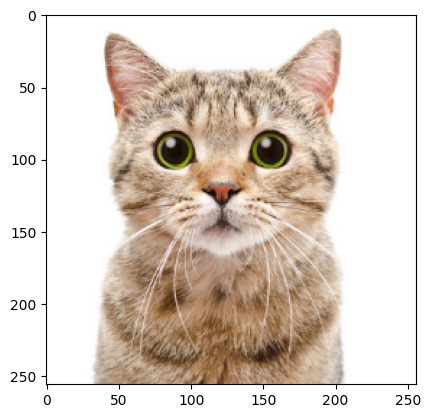

In [26]:
plt.imshow(img.permute(1,2,0) / 255.0)

In [27]:
y = test_convlayer(img)
tensor_info(y)

Размер тензора: torch.Size([1, 256, 256])
Тип данных элементов тензора: torch.float32
Максимальный элемент: 179.39247131347656
Минимальный элемент: -63.352386474609375
Тип данных тензора: <class 'torch.Tensor'>


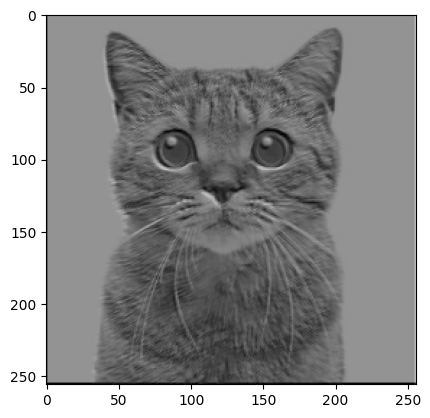

In [28]:
plt.imshow(y.detach().numpy()[0], cmap='gray')

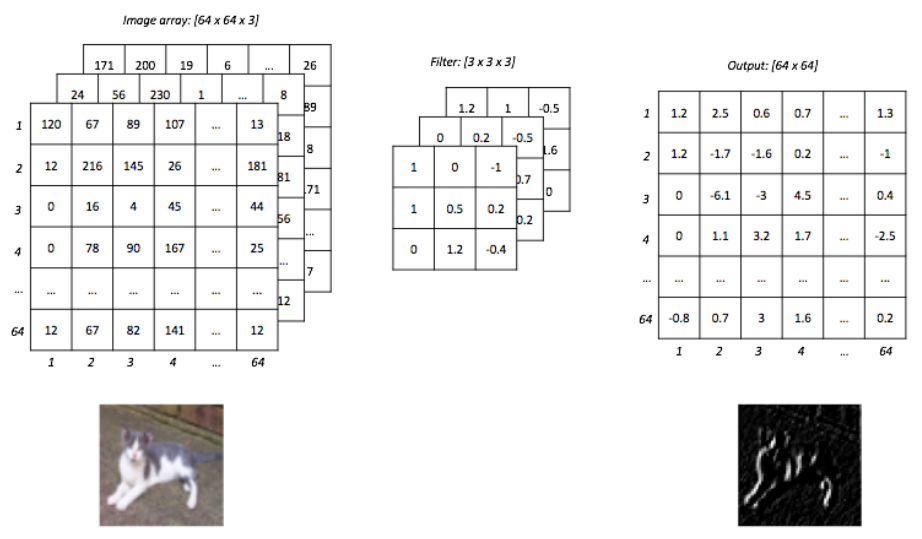

In [77]:
# анимации сверток
# https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md

### Суб-дискретизация, Пулинг (Pooling)

#### 1) Max Pooling

![Screenshot from 2024-10-13 19-03-20.png](<attachment:Screenshot from 2024-10-13 19-03-20.png>)
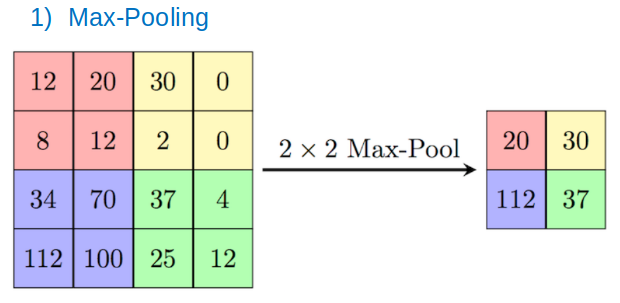

In [29]:
test_maxpool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)

tensor([[117.,   7.,   2.,  74.],
        [227.,  66., 130.,  99.],
        [159., 237., 241., 193.],
        [ 96.,  54., 154., 145.]]) torch.Size([4, 4])


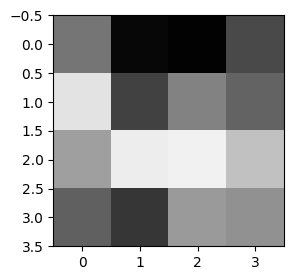

In [38]:
x = torch.randint(0, 255, size=(4, 4))
x = x.type(torch.float32)

print(x, x.shape)
plt.figure(figsize=(3, 3))
plt.imshow(x, cmap='gray', vmin=0, vmax=255)

# tensor([[[200., 196.],
#         [184., 171.]]])


In [39]:
y = test_maxpool(x.unsqueeze(0))
tensor_info(y)

Размер тензора: torch.Size([1, 2, 2])
Тип данных элементов тензора: torch.float32
Максимальный элемент: 241.0
Минимальный элемент: 130.0
Тип данных тензора: <class 'torch.Tensor'>


tensor([[[227., 130.],
         [237., 241.]]])


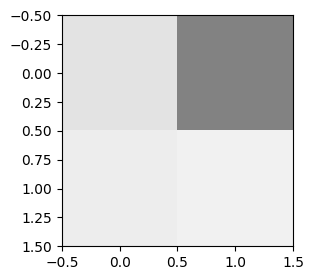

In [40]:
plt.figure(figsize=(3, 3))
plt.imshow(y.detach().numpy()[0], cmap='gray', vmin=0, vmax=255)

print(y)

#### 2) Average Pooling

![Screenshot from 2024-10-13 19-03-51.png](<attachment:Screenshot from 2024-10-13 19-03-51.png>)
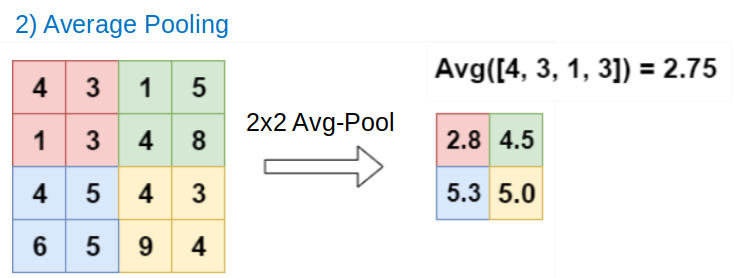

In [41]:
test_avgpool = nn.AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
            # nn.AdaptiveAvgPool2d((6,6))

tensor([[5., 5., 1., 0.],
        [3., 9., 4., 5.],
        [8., 9., 9., 0.],
        [9., 6., 5., 5.]]) torch.Size([4, 4])


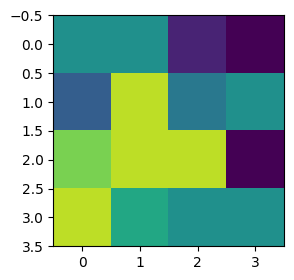

In [42]:
x = torch.randint(0, 10, size=(4, 4))
x = x.type(torch.float32)

print(x, x.shape)
plt.figure(figsize=(3, 3))
plt.imshow(x, cmap='viridis', vmin=0, vmax=10)


In [43]:
y = test_avgpool(x.unsqueeze(0))
tensor_info(y)

Размер тензора: torch.Size([1, 2, 2])
Тип данных элементов тензора: torch.float32
Максимальный элемент: 8.0
Минимальный элемент: 2.5
Тип данных тензора: <class 'torch.Tensor'>


tensor([[[5.5000, 2.5000],
         [8.0000, 4.7500]]])


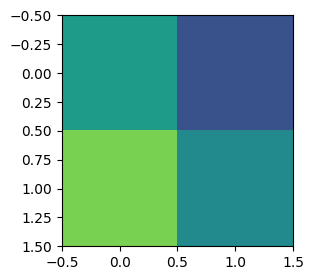

In [44]:
plt.figure(figsize=(3, 3))
plt.imshow(y.detach().numpy()[0], cmap='viridis', vmin=0, vmax=10)

print(y)

## 2. Сверточная нейронная сеть

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import torchvision
import torchinfo

import torchvision.transforms as transforms
from torch.utils.data import DataLoader


### Подготовка данных

In [46]:
# Загрузка данных SVHN
tr = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

train_dataset = torchvision.datasets.SVHN(root='./data', split='train', download=True, transform=tr)
test_dataset = torchvision.datasets.SVHN(root='./data', split='test', download=True, transform=tr)

# Закомментировать, если работать со всем датасетом 
train_dataset, _ = torch.utils.data.random_split(train_dataset, [30000, len(train_dataset) - 30000])
test_dataset, _ = torch.utils.data.random_split(test_dataset, [5000, len(test_dataset) - 5000])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


In [47]:
len(train_dataset), len(test_dataset)

(30000, 5000)

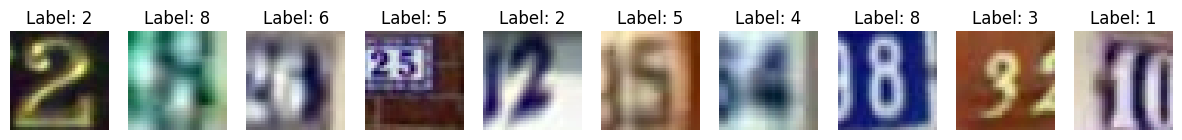

In [48]:
# Функция для отображения изображений
def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    
    for i in range(num_images):
        image, label = dataset[i]  # Получаем изображение и метку
        axes[i].imshow((image.permute(1, 2, 0) - image.min())/ (image.max() - image.min()) )  # Преобразуем для отображения
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')

    plt.show()

# Отображаем 10 изображений из тренировочного датасета
show_images(test_dataset, num_images=10)


### Определение класса модели SmallCNN

Создание простой CNN для задачи классификации изображений

**План работы:**
1. **Загрузка данных**: Работа с `SVHN` с использованием PyTorch.
2. **Создание CNN**: Реализуем простую CNN для классификации.
3. **Обучение модели**: Использование функции потерь `CrossEntropyLoss` и оптимизатора `Adam`.
4. **Оценка и визуализация**: Построение графиков точности и функции потерь.


In [50]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Сверточный слой       # 3x32x32 -> 16 карт, 3х3 - размер фильтра, шаг фильтра - (1 по гор, 1 по верт.), заполн за границей изобр. - 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1, padding_mode="zeros")
                                # 34x34 после паддинга, -> 16 карт, размером 32х32 
        # Max Pooling           # 16 карт 32х32
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
                                # 16 карт, 16х16
        # Полносвязный слой
        self.fc1 = nn.Linear(16 * 16 * 16, 10)  # Классификация на 10 классов
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Применяем свертку, ReLU и пулинг
        x = x.view(-1, 16 * 16 * 16)          # Векторизация
        x = self.fc1(x)                       # Полносвязный слой
        return x

# Проверка модели на примере изображения 3x32x32
model = SimpleCNN()
print(model)

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=10, bias=True)
)


In [66]:
torchinfo.summary(model, input_size=(3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
SimpleCNN                                [1, 10]                   --
├─Conv2d: 1-1                            [16, 32, 32]              448
├─MaxPool2d: 1-2                         [16, 16, 16]              --
├─Linear: 1-3                            [1, 10]                   40,970
Total params: 41,418
Trainable params: 41,418
Non-trainable params: 0
Total mult-adds (M): 0.27
Input size (MB): 0.01
Forward/backward pass size (MB): 0.13
Params size (MB): 0.17
Estimated Total Size (MB): 0.31

### Обучение модели SmallCNN

In [67]:
# Оценка точности модели
def evaluate_model(model, test_loader, device='cpu'):
    model = model.to(device)
    model.eval()  # Устанавливаем модель в режим оценки
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total * 100
    # print(f"Accuracy: {accuracy:.2f}%")
    return accuracy

# Обучение модели
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device='cpu'):
    
    model = model.to(device)
    model.train()
    
    loss_history = []
    train_accs = []
    test_accs = []
    
    for epoch in range(num_epochs):
    
        model.train()
        
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()  # Обнуляем градиенты
            
            outputs = model(images)  # Прямой проход
            loss = criterion(outputs, labels)  # Вычисляем потерю
            
            loss.backward()  # Обратный проход
            optimizer.step()  # Обновляем параметры

            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        
        epoch_loss = running_loss / len(train_loader)
        loss_history.append(epoch_loss)
        train_acc = correct / total * 100
        train_accs.append(train_acc)
        
        test_acc = evaluate_model(model, test_loader, device=device)
        test_accs.append(test_acc)
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Test Accuracy: {test_acc:.2f}%")
    
    return loss_history, train_accs, test_accs



In [68]:
### Обучение и оценка модели
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SimpleCNN().to(device)
num_epochs = 30

In [69]:
# Выбор критерия оптимизации и оптимизатора 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [ ]:
loss_history, train_accs, test_accs = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=num_epochs, device=device)
# accuracy = evaluate_model(model, test_loader, device=device)

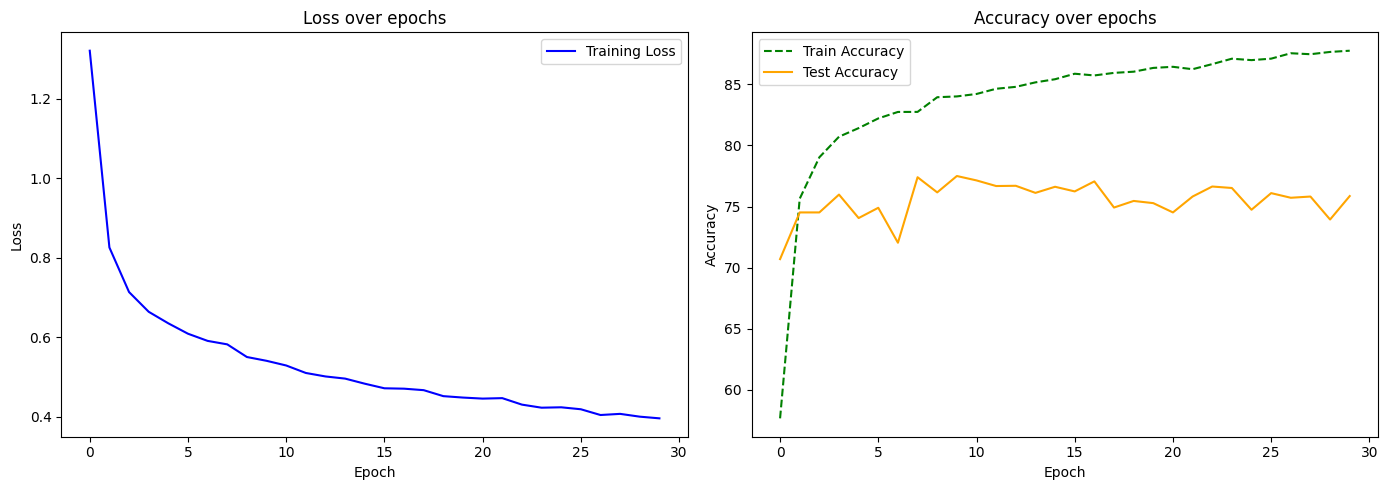

In [ ]:
# Количество эпох (длина списков)
epochs = len(loss_history)

# Создание первой фигуры для графика потерь
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss_history, label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()

# Создание второй фигуры для графика точностей
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accs, label='Train Accuracy', color='green', linestyle='--')
plt.plot(range(epochs), test_accs, label='Test Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

# Показываем оба графика
plt.tight_layout()
plt.show()

In [ ]:
print(f'Лучшая тестовая точность: {max(test_accs):.2f}%')

Лучшая тестовая точность: 77.38%


### Карты признаков 

In [ ]:
# Визуализация первой карты признаков (можно выбрать любую карту для отображения)
def show_feature_maps(feature_maps):
    num_feature_maps = feature_maps.shape[1]
    fig, axs = plt.subplots(1, num_feature_maps, figsize=(20, 5))
    for i in range(num_feature_maps):
        axs[i].imshow(feature_maps[0, i].detach().cpu().numpy(), cmap='gray')  # Визуализация карты признаков
        axs[i].axis('off')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


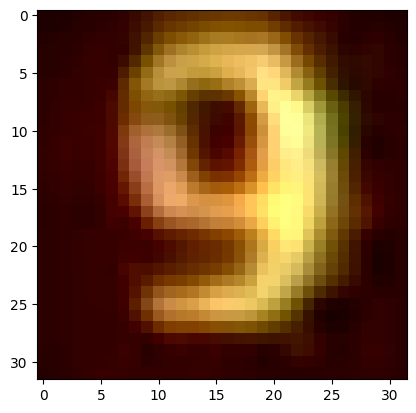

In [ ]:
input_image = test_dataset[0][0]
plt.imshow(input_image.permute(1,2,0) - input_image.min() / (input_image.max() - input_image.min()))

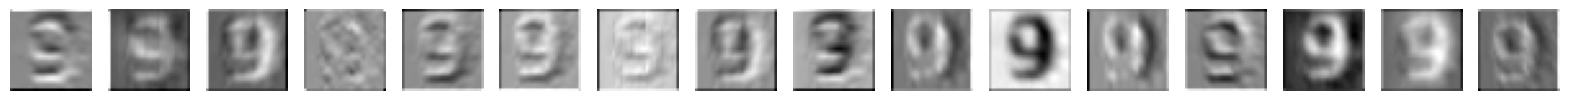

In [ ]:
# Хуки позволяют перехватывать выводы определённых слоев без изменения самой модели. Например:
input_image = input_image.to(device).unsqueeze(0)
# Функция для сохранения карт признаков
def hook_fn(module, input, output):
    global feature_maps
    feature_maps = output

# Подключаем хук к слою conv1
hook = model.conv1.register_forward_hook(hook_fn)

# Прямой проход
output = model(input_image)

# Визуализация карт признаков
show_feature_maps(feature_maps)

---

### Определение класса модели MediumCNN 

In [ ]:
class MediumCNN(nn.Module):
    def __init__(self):
        super(MediumCNN, self).__init__()
        # Сверточный слой 1     # 32x32 -> 28x28
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        # Avg Pooling 1
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)
                    # 14x14
        # Сверточный слой 2
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
                    # 10x10
        # Avg Pooling 2
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)
                    # 16 x 5x5
        # Полносвязные слои
        self.fc1 = nn.Linear(5 * 5 * 16, 120)       # 
        self.fc2 = nn.Linear(120, 84)           # 
        self.fc3 = nn.Linear(84, 10)            # Классификация на 10 классов
        
    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))   # Применяем свертку, ReLU и пулинг
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 5 * 5 * 16)              # Векторизация
        x = F.relu(self.fc1(x))                 # Полносвязные слои
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
       
        return x

# Проверка модели на примере изображения 3x32x32
model = MediumCNN()
print(model)

MediumCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [71]:
torchinfo.summary(model, input_size=(3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
MediumCNN                                [1, 10]                   --
├─Conv2d: 1-1                            [6, 28, 28]               456
├─AvgPool2d: 1-2                         [6, 14, 14]               --
├─Conv2d: 1-3                            [16, 10, 10]              2,416
├─AvgPool2d: 1-4                         [16, 5, 5]                --
├─Linear: 1-5                            [1, 120]                  48,120
├─Linear: 1-6                            [1, 84]                   10,164
├─Linear: 1-7                            [1, 10]                   850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
Total mult-adds (M): 0.52
Input size (MB): 0.01
Forward/backward pass size (MB): 0.05
Params size (MB): 0.25
Estimated Total Size (MB): 0.31

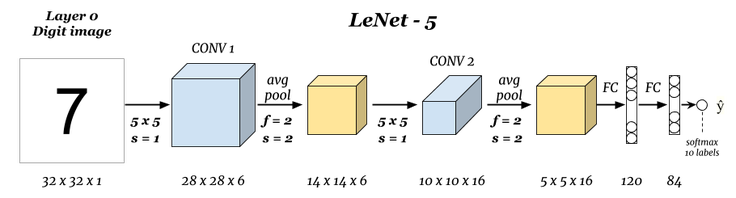

LeNet-5 was trained for about 20 epoches over MNIST. It took 2 to 3 days of CPU time on a Silicon Graphics Origin 2000 server, using a single 200 MHz R10000 processor. (wiki)

### Обучение модели MediumCNN

In [98]:
### Обучение и оценка модели
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = MediumCNN().to(device)
num_epochs = 30

In [99]:
# Выбор критерия оптимизации и оптимизатора 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [100]:
loss_history, train_accs, test_accs = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=num_epochs, device=device)
# accuracy = evaluate_model(model, test_loader, device=device)

Epoch [1/30], Loss: 1.2596, Train Accuracy: 56.94%, Test Accuracy: 80.16%
Epoch [2/30], Loss: 0.5498, Train Accuracy: 83.29%, Test Accuracy: 83.22%
Epoch [3/30], Loss: 0.4593, Train Accuracy: 86.14%, Test Accuracy: 84.80%
Epoch [4/30], Loss: 0.4127, Train Accuracy: 87.47%, Test Accuracy: 83.86%
Epoch [5/30], Loss: 0.3761, Train Accuracy: 88.56%, Test Accuracy: 84.28%
Epoch [6/30], Loss: 0.3483, Train Accuracy: 89.36%, Test Accuracy: 84.24%
Epoch [7/30], Loss: 0.3176, Train Accuracy: 90.21%, Test Accuracy: 84.82%
Epoch [8/30], Loss: 0.3067, Train Accuracy: 90.51%, Test Accuracy: 83.96%
Epoch [9/30], Loss: 0.2882, Train Accuracy: 91.15%, Test Accuracy: 85.10%
Epoch [10/30], Loss: 0.2710, Train Accuracy: 91.59%, Test Accuracy: 84.74%
Epoch [11/30], Loss: 0.2686, Train Accuracy: 91.54%, Test Accuracy: 84.70%
Epoch [12/30], Loss: 0.2468, Train Accuracy: 92.34%, Test Accuracy: 84.76%
Epoch [13/30], Loss: 0.2402, Train Accuracy: 92.46%, Test Accuracy: 84.70%
Epoch [14/30], Loss: 0.2348, Train

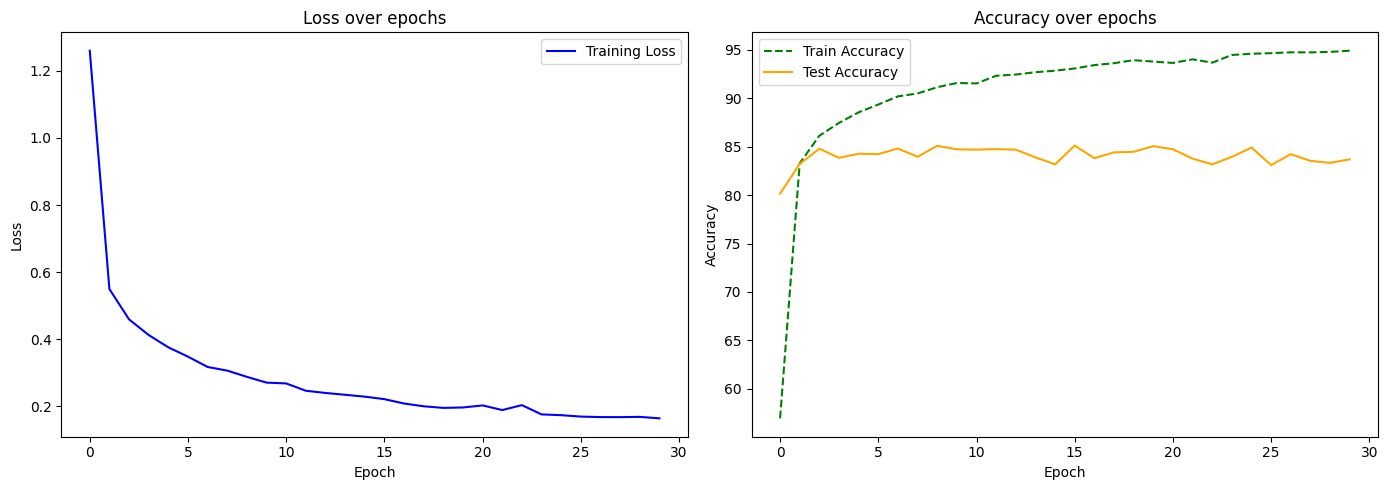

In [101]:
# Количество эпох (длина списков)
epochs = len(loss_history)

# Создание первой фигуры для графика потерь
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss_history, label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()

# Создание второй фигуры для графика точностей
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accs, label='Train Accuracy', color='green', linestyle='--')
plt.plot(range(epochs), test_accs, label='Test Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

# Показываем оба графика
plt.tight_layout()
plt.show()

In [102]:
print(f'Лучшая тестовая точность: {max(test_accs):.2f}%')

Лучшая тестовая точность: 85.12%


### Карты признаков

In [116]:
# Функция для визуализации карт признаков
def show_feature_maps(feature_maps):
    num_feature_maps = feature_maps.shape[1]
    fig, axs = plt.subplots(1, num_feature_maps, figsize=(20, 5))
    for i in range(num_feature_maps):
        axs[i].imshow(feature_maps[0, i].detach().cpu().numpy(), cmap='gray')  # Переводим тензор на CPU
        axs[i].axis('off')
    plt.show()

In [117]:
# Получаем одно изображение
input_image, label = next(iter(test_loader))


In [118]:
input_image[0].shape

torch.Size([3, 32, 32])

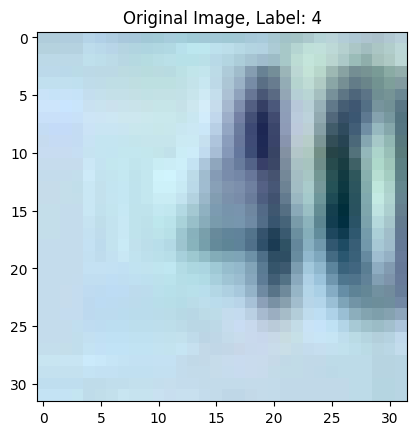

In [119]:
# Переводим изображение в NumPy и нормализуем его для корректного отображения
image_np = input_image[0].permute(1, 2, 0).detach().cpu().numpy()  # Преобразование в NumPy

# Нормализация для отображения
image_np = (image_np - image_np.min()) / (image_np.max() - image_np.min())

# Визуализация изображения
plt.imshow(image_np)
plt.title(f"Original Image, Label: {label[0]}")
plt.show()

In [120]:
# Переводим изображение на устройство (CPU/GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_image = input_image.to(device)
model.to(device)

MediumCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [121]:
# Функция для сохранения карт признаков через хук
feature_maps_conv1 = None
feature_maps_conv2 = None

def hook_conv1(module, input, output):
    global feature_maps_conv1
    feature_maps_conv1 = output

def hook_conv2(module, input, output):
    global feature_maps_conv2
    feature_maps_conv2 = output

# Подключаем хуки к слоям conv1 и conv2
hook1 = model.conv1.register_forward_hook(hook_conv1)
hook2 = model.conv2.register_forward_hook(hook_conv2)

Feature maps after conv1:


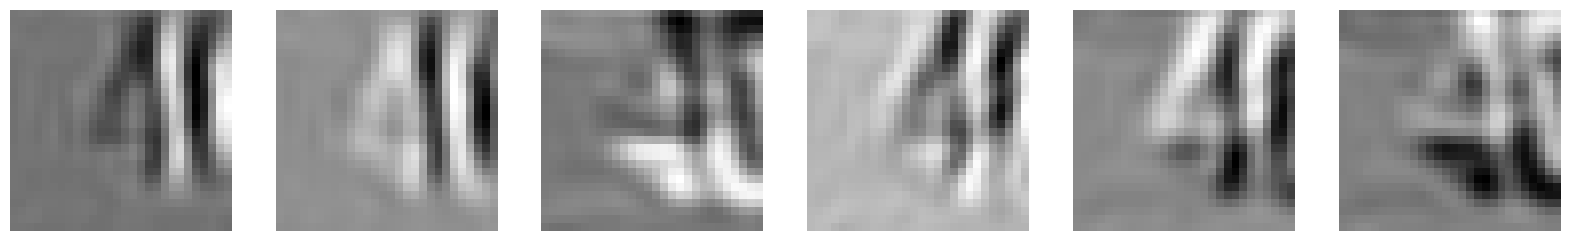

Feature maps after conv2:


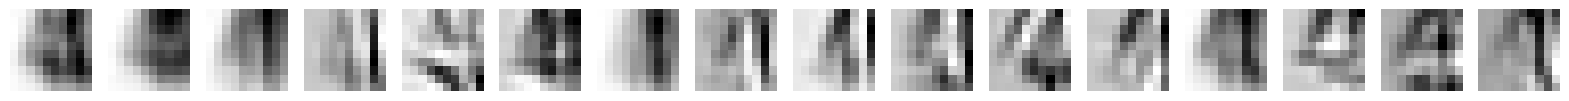

In [122]:
# Прямой проход через модель
output = model(input_image)

# Визуализация карт признаков после conv1
print("Feature maps after conv1:")
show_feature_maps(feature_maps_conv1)

# Визуализация карт признаков после conv2
print("Feature maps after conv2:")
show_feature_maps(feature_maps_conv2)

# Удаление хуков
hook1.remove()
hook2.remove()

In [51]:
import torch
a = torch.randint(0, 255, (3,3,3 ))

In [52]:
a

tensor([[[ 54, 163,  44],
         [ 79, 129,  35],
         [241, 199, 122]],

        [[231, 136, 245],
         [ 31,  74, 251],
         [125, 149,  75]],

        [[170, 225, 195],
         [238,  40, 125],
         [252,  23,  32]]])

In [53]:
a.view(-1, 27)

tensor([[ 54, 163,  44,  79, 129,  35, 241, 199, 122, 231, 136, 245,  31,  74,
         251, 125, 149,  75, 170, 225, 195, 238,  40, 125, 252,  23,  32]])

## 3. Архитектуры CNN

**Архитектуры CNN:**
- **AlexNet** (развитие LeNet): Первое применение CNN в соревнованиях по компьютерному зрению (ImageNet).
- **VGG**: Углубленные сети с небольшими фильтрами 3x3.
- **ResNet**: Революционная архитектура с прямыми связями (skip connections) для борьбы с деградацией градиента.


In [54]:
from torchvision import models
import torchinfo

# AlexNet
alexnet = models.alexnet(weights='DEFAULT')   # ImageNet weights

# VGG16
vgg16 = models.vgg16(weights='DEFAULT')

# ResNet18
resnet18 = models.resnet18(weights='DEFAULT')


- Почему архитектуры AlexNet, VGG и ResNet изменили подход к CNN.
- Влияние глубины сети и размеров фильтров на точность и вычислительные ресурсы.



#### 1. **AlexNet (2012)**


In [13]:
torchinfo.summary(alexnet, input_size=(1,3,256,256))

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 1000]                 --
├─Sequential: 1-1                        [1, 256, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 63, 63]           23,296
│    └─ReLU: 2-2                         [1, 64, 63, 63]           --
│    └─MaxPool2d: 2-3                    [1, 64, 31, 31]           --
│    └─Conv2d: 2-4                       [1, 192, 31, 31]          307,392
│    └─ReLU: 2-5                         [1, 192, 31, 31]          --
│    └─MaxPool2d: 2-6                    [1, 192, 15, 15]          --
│    └─Conv2d: 2-7                       [1, 384, 15, 15]          663,936
│    └─ReLU: 2-8                         [1, 384, 15, 15]          --
│    └─Conv2d: 2-9                       [1, 256, 15, 15]          884,992
│    └─ReLU: 2-10                        [1, 256, 15, 15]          --
│    └─Conv2d: 2-11                      [1, 256, 15, 15]         


**Влияние на CNN**:
- **Глубокая сеть**: AlexNet была первой сетью, которая значительно увеличила глубину по сравнению с предыдущими архитектурами. Она включала 5 сверточных слоев и 3 полносвязных слоя. Это позволило модели лучше захватывать сложные особенности изображений.
- **ReLU активация**: AlexNet ввела использование нелинейной функции активации **ReLU** (Rectified Linear Unit) вместо традиционной **sigmoid** или **tanh**. ReLU оказалась гораздо эффективнее в обучении глубоких сетей, так как решает проблему исчезающего градиента.
- **Dropout**: AlexNet внедрила **Dropout** для предотвращения переобучения, что сделало модель более устойчивой к шуму в данных.
- **Использование GPU**: Архитектура активно использовала вычислительные мощности графических процессоров (GPU), что значительно ускорило обучение сети на больших объемах данных, таких как ImageNet.

**Изменение подхода**: AlexNet продемонстрировала, что глубина сети и применение новых нелинейных функций активации (ReLU) могут значительно улучшить точность в задачах распознавания изображений.

---



#### 2. **VGG (2014)**


In [14]:
torchinfo.summary(vgg16, input_size=(1,3,256,256))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 1000]                 --
├─Sequential: 1-1                        [1, 512, 8, 8]            --
│    └─Conv2d: 2-1                       [1, 64, 256, 256]         1,792
│    └─ReLU: 2-2                         [1, 64, 256, 256]         --
│    └─Conv2d: 2-3                       [1, 64, 256, 256]         36,928
│    └─ReLU: 2-4                         [1, 64, 256, 256]         --
│    └─MaxPool2d: 2-5                    [1, 64, 128, 128]         --
│    └─Conv2d: 2-6                       [1, 128, 128, 128]        73,856
│    └─ReLU: 2-7                         [1, 128, 128, 128]        --
│    └─Conv2d: 2-8                       [1, 128, 128, 128]        147,584
│    └─ReLU: 2-9                         [1, 128, 128, 128]        --
│    └─MaxPool2d: 2-10                   [1, 128, 64, 64]          --
│    └─Conv2d: 2-11                      [1, 256, 64, 64]          29


**Влияние на CNN**:
- **Простота и модульность**: Архитектура **VGG** предложила использовать только 3x3 свертки, но в больших количествах. Например, в VGG16 (16 слоев) все сверточные слои применяли 3x3 фильтры с шагом 1. Это упростило структуру сети, сделав ее более унифицированной и легко расширяемой.
- **Глубокие сети**: VGG пошла дальше AlexNet, значительно углубив сеть. В некоторых версиях число слоев доходило до 19 (VGG19), что позволило модели захватывать более детализированные признаки изображения.
- **Многоуровневая архитектура**: После каждого блока сверток следовал слой пулинга (pooling), что уменьшало размерность карты признаков и позволяло эффективно сворачивать информацию.

**Изменение подхода**: VGG продемонстрировала, что увеличение глубины сети с использованием простых слоев (3x3 сверток) может значительно улучшить производительность, делая модель более выразительной, но при этом легко реализуемой.

---



#### 3. **ResNet (2015)**


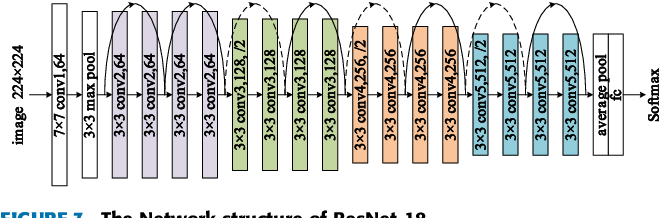

In [15]:
torchinfo.summary(resnet18, input_size=(1,3,256,256))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 1000]                 --
├─Conv2d: 1-1                            [1, 64, 128, 128]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 128, 128]         128
├─ReLU: 1-3                              [1, 64, 128, 128]         --
├─MaxPool2d: 1-4                         [1, 64, 64, 64]           --
├─Sequential: 1-5                        [1, 64, 64, 64]           --
│    └─BasicBlock: 2-1                   [1, 64, 64, 64]           --
│    │    └─Conv2d: 3-1                  [1, 64, 64, 64]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 64, 64]           128
│    │    └─ReLU: 3-3                    [1, 64, 64, 64]           --
│    │    └─Conv2d: 3-4                  [1, 64, 64, 64]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 64, 64]           128
│    │    └─ReLU: 3-6                    [1, 64, 64, 64]           --
│


**Влияние на CNN**:
- **Residual Learning**: Самое главное новшество, введенное ResNet, — это концепция **residual connections** (остаточных связей). Эти связи позволяют сигналу напрямую проходить через несколько слоев, минуя некоторые блоки (skip connections). Это решило проблему исчезающего градиента, которая возникает при обучении очень глубоких сетей.
- **Глубокие сети без переобучения**: ResNet позволила строить очень глубокие модели, до 152 слоев, без значительных проблем переобучения или деградации производительности, что было основной проблемой у предыдущих архитектур.

**Изменение подхода**: ResNet изменила парадигму построения нейронных сетей, продемонстрировав, что можно создавать **очень глубокие сети**, которые эффективно обучаются благодаря residual connections. Это открыло дверь для построения еще более сложных архитектур.



---



#### Итоговое влияние на CNN

1. **AlexNet** показала важность глубины сети, применения ReLU и использования GPU для ускорения обучения.
2. **VGG** упростила структуру CNN, сделав акцент на модульность и использование одинаковых фильтров (3x3), при этом значительно увеличив глубину.
3. **ResNet** решила проблему обучения глубоких сетей и позволила строить архитектуры с сотнями слоев благодаря residual connections.

### Подготовка данных для ResNet

In [18]:
# Загрузка данных SVHN
tr = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.Resize(64, antialias=True)  # не очень хорошо
    ])

train_dataset = torchvision.datasets.SVHN(root='./data', split='train', download=True, transform=tr)
test_dataset = torchvision.datasets.SVHN(root='./data', split='test', download=True, transform=tr)

# Закомментировать, если работать со всем датасетом 
train_dataset, _ = torch.utils.data.random_split(train_dataset, [30000, len(train_dataset) - 30000])
test_dataset, _ = torch.utils.data.random_split(test_dataset, [5000, len(test_dataset) - 5000])


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


In [19]:
len(train_dataset), len(test_dataset), train_dataset[0][0].shape

(30000, 5000, torch.Size([3, 64, 64]))

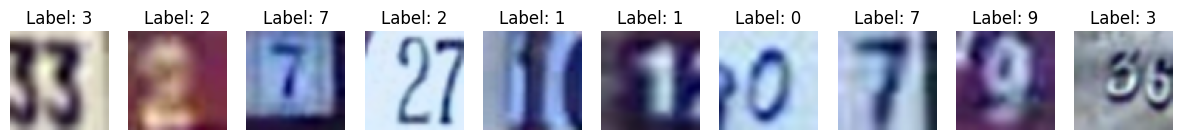

In [20]:
# Функция для отображения изображений
def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    
    for i in range(num_images):
        image, label = dataset[i]  # Получаем изображение и метку
        axes[i].imshow((image.permute(1, 2, 0) - image.min())/ (image.max() - image.min()) )  # Преобразуем для отображения
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')

    plt.show()

# Отображаем 5 изображений из тренировочного датасета
show_images(test_dataset, num_images=10)


### До-определение архитектуры ResNet

In [56]:
# ResNet18
model = models.resnet18(weights='DEFAULT')          # imagenet1000


In [57]:
torchinfo.summary(model, input_size=(1, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 1000]                 --
├─Conv2d: 1-1                            [1, 64, 32, 32]           9,408
├─BatchNorm2d: 1-2                       [1, 64, 32, 32]           128
├─ReLU: 1-3                              [1, 64, 32, 32]           --
├─MaxPool2d: 1-4                         [1, 64, 16, 16]           --
├─Sequential: 1-5                        [1, 64, 16, 16]           --
│    └─BasicBlock: 2-1                   [1, 64, 16, 16]           --
│    │    └─Conv2d: 3-1                  [1, 64, 16, 16]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 16, 16]           128
│    │    └─ReLU: 3-3                    [1, 64, 16, 16]           --
│    │    └─Conv2d: 3-4                  [1, 64, 16, 16]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 16, 16]           128
│    │    └─ReLU: 3-6                    [1, 64, 16, 16]           --
│

Чтобы использовать предобученную модель `ResNet18` без последнего fully-connected (полносвязного) слоя, можно загрузить модель через `torchvision.models`, удалить или заменить последний слой, чтобы адаптировать её под вашу задачу

1) Загрузим предобученную модель `ResNet18`.
2) Удалим последний слой (классификатор) или заменим его на другой, если необходимо для задачи (например, для другой задачи классификации).


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# Загрузка предобученной ResNet18
resnet18 = models.resnet18(weights='DEFAULT')

# Удаление последнего слоя (fc - fully connected)
# Размер последнего слоя: nn.Linear(512, 1000), где 1000 — это количество классов ImageNet
# Заменяем на nn.Identity(), чтобы "отключить" этот слой
resnet18.fc = nn.Identity()

# Теперь resnet18 выдаёт признаки перед последним слоем
# Проверим, как это работает на примере данных
input_data = torch.randn(1, 3, 224, 224)  # случайное входное изображение 224x224 с 3 каналами (RGB)
features = resnet18(input_data) # эмбеддинг

print(features.shape)  # Вывод: torch.Size([1, 512]), то есть размерность признаков перед последним слоем


torch.Size([1, 512])


- В этом примере последний слой `fc` (fully connected), который отвечает за предсказания, заменяется на `nn.Identity()`. Теперь модель будет выдавать 512-мерные признаки, которые можно использовать, например, для кластеризации, feature extraction или передать в другой классификатор.


  
- Если нужно **заменить последний слой** для другой задачи классификации (например, на 10 классов), можно сделать это так:


In [63]:
resnet18 = models.resnet18(weights='DEFAULT')


In [64]:
resnet18.fc

Linear(in_features=512, out_features=1000, bias=True)

In [65]:
# Заменить последний слой на классификатор для 10 классов
resnet18.fc = nn.Linear(512, 10)

# Теперь модель предсказывает 10 классов
output = resnet18(input_data)
print(output.shape)  # torch.Size([1, 10])


torch.Size([1, 10])


### До-обучение модели ResNet

In [530]:
# Оценка точности модели
def evaluate_model(model, test_loader, device='cpu'):
    model = model.to(device)
    model.eval()  # Устанавливаем модель в режим оценки
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total * 100
    # print(f"Accuracy: {accuracy:.2f}%")
    return accuracy

# Обучение модели
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device='cpu'):
    
    model = model.to(device)
    model.train()
    
    loss_history = []
    train_accs = []
    test_accs = []
    
    for epoch in range(num_epochs):
    
        running_loss = 0.0
        correct = 0
        total = 0
        
        model.train()

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()  # Обнуляем градиенты
            
            outputs = model(images)  # Прямой проход
            loss = criterion(outputs, labels)  # Вычисляем потерю
            
            loss.backward()  # Обратный проход
            optimizer.step()  # Обновляем параметры

            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        
        epoch_loss = running_loss / len(train_loader)
        loss_history.append(epoch_loss)
        train_acc = correct / total * 100
        train_accs.append(train_acc)
        
        test_acc = evaluate_model(model, test_loader, device=device)
        test_accs.append(test_acc)
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Test Accuracy: {test_acc:.2f}%")
    
    return loss_history, train_accs, test_accs



In [532]:
### Обучение и оценка модели
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = models.resnet18(weights='DEFAULT')
model.fc = nn.Linear(512, 10)
model = model.to(device)

num_epochs = 30

In [534]:
torchinfo.summary(model, input_size=(1, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 10]                   --
├─Conv2d: 1-1                            [1, 64, 32, 32]           9,408
├─BatchNorm2d: 1-2                       [1, 64, 32, 32]           128
├─ReLU: 1-3                              [1, 64, 32, 32]           --
├─MaxPool2d: 1-4                         [1, 64, 16, 16]           --
├─Sequential: 1-5                        [1, 64, 16, 16]           --
│    └─BasicBlock: 2-1                   [1, 64, 16, 16]           --
│    │    └─Conv2d: 3-1                  [1, 64, 16, 16]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 16, 16]           128
│    │    └─ReLU: 3-3                    [1, 64, 16, 16]           --
│    │    └─Conv2d: 3-4                  [1, 64, 16, 16]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 16, 16]           128
│    │    └─ReLU: 3-6                    [1, 64, 16, 16]           --
│

In [535]:
# Выбор критерия оптимизации и оптимизатора 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [536]:
loss_history, train_accs, test_accs = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=num_epochs, device=device)
# accuracy = evaluate_model(model, test_loader, device=device)

Epoch [1/30], Loss: 2.3411, Train Accuracy: 17.30%, Test Accuracy: 18.64%
Epoch [2/30], Loss: 2.2405, Train Accuracy: 18.77%, Test Accuracy: 18.64%
Epoch [3/30], Loss: 2.2384, Train Accuracy: 18.88%, Test Accuracy: 18.64%
Epoch [4/30], Loss: 1.7223, Train Accuracy: 39.49%, Test Accuracy: 69.24%
Epoch [5/30], Loss: 0.6165, Train Accuracy: 80.87%, Test Accuracy: 84.18%
Epoch [6/30], Loss: 0.4132, Train Accuracy: 87.26%, Test Accuracy: 85.42%
Epoch [7/30], Loss: 0.3225, Train Accuracy: 90.26%, Test Accuracy: 88.18%
Epoch [8/30], Loss: 0.2647, Train Accuracy: 91.97%, Test Accuracy: 89.82%
Epoch [9/30], Loss: 0.2221, Train Accuracy: 93.43%, Test Accuracy: 88.48%
Epoch [10/30], Loss: 0.1874, Train Accuracy: 94.25%, Test Accuracy: 89.86%
Epoch [11/30], Loss: 0.1529, Train Accuracy: 95.32%, Test Accuracy: 89.42%
Epoch [12/30], Loss: 0.1318, Train Accuracy: 95.95%, Test Accuracy: 89.82%
Epoch [13/30], Loss: 0.1132, Train Accuracy: 96.36%, Test Accuracy: 90.00%
Epoch [14/30], Loss: 0.0948, Train

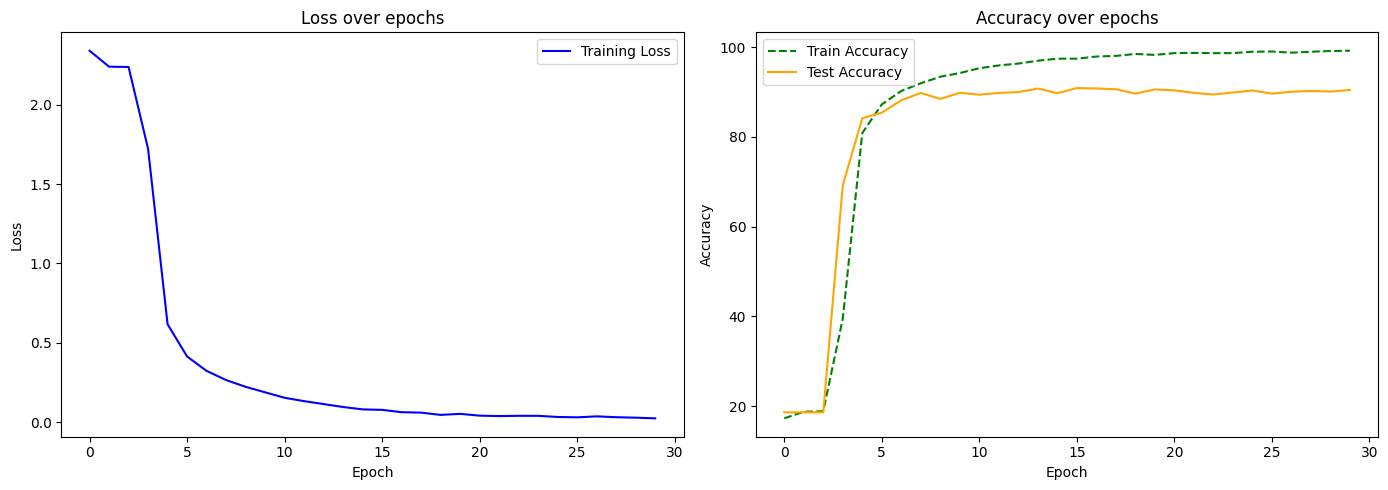

In [537]:
# Количество эпох (длина списков)
epochs = len(loss_history)

# Создание первой фигуры для графика потерь
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss_history, label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()

# Создание второй фигуры для графика точностей
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accs, label='Train Accuracy', color='green', linestyle='--')
plt.plot(range(epochs), test_accs, label='Test Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

# Показываем оба графика
plt.tight_layout()
plt.show()

In [538]:
print(f'Лучшая тестовая точность: {max(test_accs):.2f}%')

Лучшая тестовая точность: 90.90%


## ** Трансформеры для последовательностей

Архитектура трансформера (Transformer) является одной из ключевых моделей для обработки последовательностей, особенно популярной в задачах обработки естественного языка (NLP). В основе трансформера лежат механизмы само-внимания (self-attention), которые позволяют модели учитывать контекст всей последовательности при обработке каждого элемента.

Трансформер состоит из двух основных частей (не всегда):
1. **Encoder** (кодировщик) — обрабатывает входную последовательность и выдает набор представлений (features).
2. **Decoder** (декодировщик) — генерирует выходную последовательность на основе представлений от кодировщика и предыдущих выходных элементов.


Трансформеры основаны на **механизме внимания** (attention), который позволяет модели сосредоточиться на определенных частях входной последовательности при обработке каждого элемента.

Формула внимания:
$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$
Где:
- $ Q $ (queries) — запросы.
- $ K $ (keys) — ключи.
- $ V $ (values) — значения.
- $ d_k $ — размерность ключей.


### Генерация Q, K и V


Матрицы $ Q $, $ K $, и $ V $ генерируются путем умножения входных данных на обучаемые весовые матрицы. Эти матрицы весов различны для каждого слоя и каждой "головы" в механизме многоголового внимания (Multi-Head Attention).

Пусть $ X $ — это входное представление последовательности:
- $ X \in \mathbb{R}^{\text{seq\_len} \times \text{model\_dim}} $
  - где $ \text{seq\_len} $ — длина входной последовательности, а $ \text{model\_dim} $ — размерность модели (размерность скрытых состояний).

Для каждой позиции в последовательности мы вычисляем:
$$
Q = XW^Q
$$
$$
K = XW^K
$$
$$
V = XW^V
$$
где:
- $ W^Q \in \mathbb{R}^{\text{model\_dim} \times d_k} $ — обучаемая матрица для запросов.
- $ W^K \in \mathbb{R}^{\text{model\_dim} \times d_k} $ — обучаемая матрица для ключей.
- $ W^V \in \mathbb{R}^{\text{model\_dim} \times d_v} $ — обучаемая матрица для значений.
- $ d_k $ и $ d_v $ — размерности ключей и значений соответственно.

Таким образом, $ Q $, $ K $ и $ V $ являются линейными проекциями исходных входных данных, преобразованных через весовые матрицы $ W^Q $, $ W^K $, и $ W^V $.

**Q** (queries, запросы), **K** (keys, ключи) и **V** (values, значения) используются в механизме внимания для вычисления весов (важности) каждой части последовательности при обработке. Это позволяет модели "понимать", какие части последовательности важны для каждой позиции.

Формула механизма внимания:
$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$
где:
- $ QK^T $ — это матричное произведение между запросами и ключами, которое вычисляет схожесть между каждой позицией последовательности.
- $ \sqrt{d_k} $ — масштабирующий фактор, который предотвращает слишком большие значения при вычислении $ QK^T $, что может ухудшить качество градиентов при обучении.
- $ \text{softmax} $ — функция, которая нормализует значения внимания, превращая их в вероятности.
- Наконец, результат умножается на матрицу $ V $ (значения), чтобы извлечь важную информацию, на основе которой и строятся дальнейшие слои модели.


### Пример в PyTorch

In [357]:
# Пример в PyTorch

import torch
import torch.nn as nn

class SelfAttention(nn.Module):
    def __init__(self, model_dim, num_heads):
        super(SelfAttention, self).__init__()
        self.num_heads = num_heads
        self.model_dim = model_dim

        # Матрицы весов для Q, K и V
        self.W_Q = nn.Linear(model_dim, model_dim)
        self.W_K = nn.Linear(model_dim, model_dim)
        self.W_V = nn.Linear(model_dim, model_dim)

        self.softmax = nn.Softmax(dim=-1)
        
    def forward(self, x):
        # Размер входных данных: (batch_size, seq_len, model_dim)
        
        # Генерация Q, K, V
        Q = self.W_Q(x)  # (batch_size, seq_len, model_dim)
        K = self.W_K(x)  # (batch_size, seq_len, model_dim)
        V = self.W_V(x)  # (batch_size, seq_len, model_dim)

        # Вычисление внимания
        scores = torch.matmul(Q, K.transpose(-2, -1)) / (self.model_dim ** 0.5)  # (batch_size, seq_len, seq_len)
        attention_weights = self.softmax(scores)  # Нормализация через softmax
        
        # Применение весов внимания к V
        output = torch.matmul(attention_weights, V)  # (batch_size, seq_len, model_dim)
        
        return output

- **Q (запросы)** задают, какие позиции ищут информацию в других позициях последовательности.
- **K (ключи)** представляют собой информацию о каждой позиции, которую можно сопоставить с запросами.
- **V (значения)** содержат фактическую информацию, которая будет использована после вычисления весов внимания на основе сопоставления запросов и ключей.


### Архитектура трансформера


**Кодировщик** состоит из нескольких одинаковых слоев, каждый из которых включает два основных компонента:
- Многоголовое внимание (Multi-Head Self-Attention).
- Полносвязные слои с нормализацией (Feed-Forward Layers).

**Декодировщик** также состоит из нескольких одинаковых слоев, которые включают три компонента:
- Многоголовое внимание.
- Механизм внимания между кодировщиком и декодировщиком.
- Полносвязные слои.

Формула многоголового внимания:
$$
\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \dots, \text{head}_h)W^O
$$
где каждая голова рассчитывается как:
$$
\text{head}_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V)
$$
$ W_i^Q, W_i^K, W_i^V $ — матрицы весов для каждой головы, $ W^O $ — матрица для финальной линейной проекции.


### Пример архитектуры трансформера в PyTorch


In [371]:
import torch
import torch.nn as nn
import torch.optim as optim

class TransformerModel(nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, output_dim):
        super(TransformerModel, self).__init__()
        
        # Кодировщик
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads)
        self.encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        
        # Декодировщик
        self.decoder_layer = nn.TransformerDecoderLayer(d_model=model_dim, nhead=num_heads)
        self.decoder = nn.TransformerDecoder(self.decoder_layer, num_layers=num_layers)
        
        # Финальные линейные слои
        self.fc_in = nn.Linear(input_dim, model_dim)
        self.fc_out = nn.Linear(model_dim, output_dim)
        
    def forward(self, src, tgt):
        # Проекция входных данных
        src = self.fc_in(src)
        tgt = self.fc_in(tgt)
        
        # Кодирование
        memory = self.encoder(src)
        
        # Декодирование
        output = self.decoder(tgt, memory)
        
        # Финальная проекция на выходное пространство
        output = self.fc_out(output)
        return output

# Параметры модели
input_dim = 512  # Размерность входных данных
model_dim = 512  # Размерность модели (d_model)
num_heads = 8    # Число голов в multi-head attention
num_layers = 6   # Число слоев кодировщика и декодировщика
output_dim = 10  # Размерность выходных данных

# Создание модели
model = TransformerModel(input_dim, model_dim, num_heads, num_layers, output_dim)

# Оптимизатор и функция потерь
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Пример данных
src = torch.randn((10, 32, input_dim))  # Входная последовательность (seq_len, batch_size, input_dim)
tgt = torch.randint(0, output_dim, (20, 32))  # Целевые метки (seq_len, batch_size)

# Прямой проход модели
output = model(src, torch.randn((20, 32, input_dim)))
output = output.view(-1, output_dim)  # Приводим к нужной форме (batch_size * seq_len, output_dim)


/home/copoka11/torch2/lib/python3.10/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


1. **Multi-Head Self-Attention**:
   - Разделение на несколько "голов" позволяет модели фокусироваться на разных аспектах последовательности одновременно.
   - Каждая голова использует механизм внимания для извлечения признаков из разных частей последовательности.
   
2. **Feed-Forward Network**:
   - После каждого слоя внимания идет полносвязная сеть, которая помогает извлечь более сложные признаки. Применяется к каждому элементу последовательности по отдельности.
   
3. **Residual Connections**:
   - Важная часть архитектуры трансформеров — добавление пропускных соединений (residual connections) вокруг каждого субслоя (внимание и полносвязная сеть), что позволяет избежать проблем с исчезновением градиента при обучении глубоких моделей.


In [373]:
# Обучение
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    
    # Прямой проход
    outputs = model(src, torch.randn((20, 32, input_dim)))
    outputs = outputs.view(-1, output_dim)  # Приводим выходы к форме (batch_size * seq_len, output_dim)
    
    # Вычисление потерь
    loss = criterion(outputs, tgt.view(-1))  # Приводим целевые метки к форме (batch_size * seq_len)
    
    # Обратное распространение и оптимизация
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/50], Loss: 2.3948
Epoch [2/50], Loss: 2.3658
Epoch [3/50], Loss: 2.3539
Epoch [4/50], Loss: 2.3524
Epoch [5/50], Loss: 2.3539
Epoch [6/50], Loss: 2.3630
Epoch [7/50], Loss: 2.3506
Epoch [8/50], Loss: 2.3394
Epoch [9/50], Loss: 2.3278
Epoch [10/50], Loss: 2.3232
Epoch [11/50], Loss: 2.3306
Epoch [12/50], Loss: 2.3283
Epoch [13/50], Loss: 2.3259
Epoch [14/50], Loss: 2.3271
Epoch [15/50], Loss: 2.3211
Epoch [16/50], Loss: 2.3259
Epoch [17/50], Loss: 2.3101
Epoch [18/50], Loss: 2.3142
Epoch [19/50], Loss: 2.3161
Epoch [20/50], Loss: 2.3188
Epoch [21/50], Loss: 2.3211
Epoch [22/50], Loss: 2.3115
Epoch [23/50], Loss: 2.3116
Epoch [24/50], Loss: 2.3121
Epoch [25/50], Loss: 2.3086
Epoch [26/50], Loss: 2.3074
Epoch [27/50], Loss: 2.3123
Epoch [28/50], Loss: 2.3115
Epoch [29/50], Loss: 2.2990
Epoch [30/50], Loss: 2.3098
Epoch [31/50], Loss: 2.3042
Epoch [32/50], Loss: 2.3015
Epoch [33/50], Loss: 2.3191
Epoch [34/50], Loss: 2.3092
Epoch [35/50], Loss: 2.3110
Epoch [36/50], Loss: 2.3028
E

## * 5. ViT (Vision Transformer)

Ниже приведен пример небольшой модели **Vision Transformer (ViT)**, которая предназначена для обработки изображений. 
Мы создадим модель ViT с небольшим количеством слоев и голов в слое внимания. Эта модель будет принимать изображения размером 32x32 и выполнять классификацию.


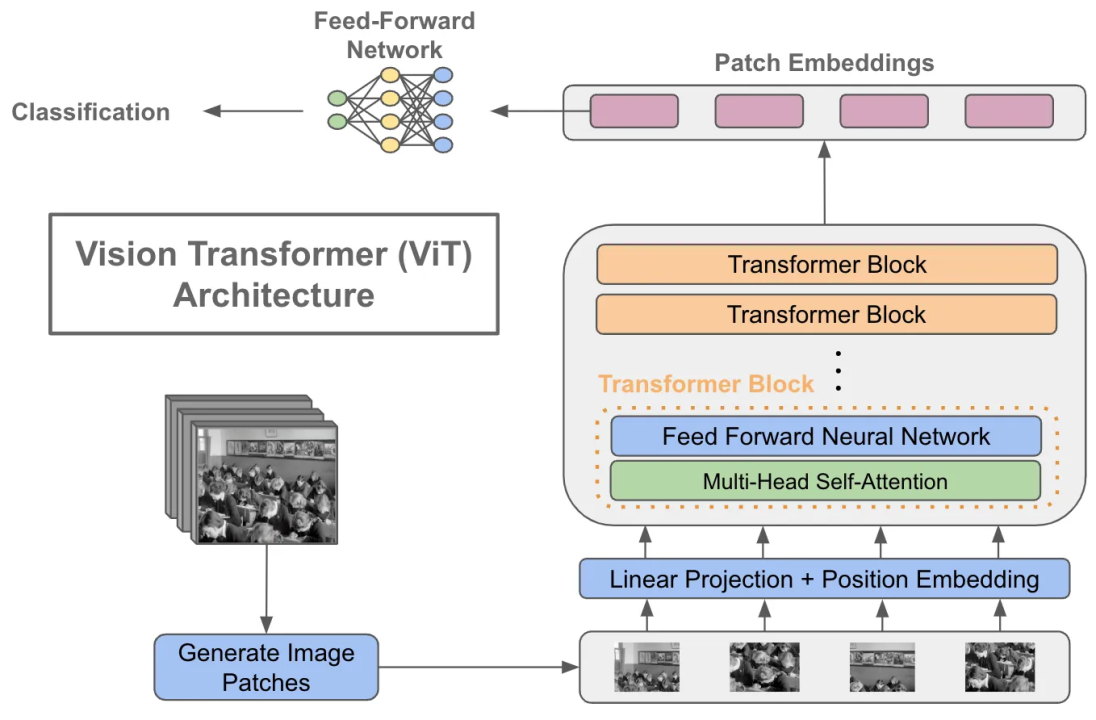

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import torchvision
import torchinfo

import torchvision.transforms as transforms
from torch.utils.data import DataLoader


In [17]:
def tensor_info(tensor):
    print(f'Размер тензора: {tensor.shape}')
    print(f'Тип данных элементов тензора: {tensor.dtype}')
    print(f'Максимальный элемент: {tensor.max()}')
    print(f'Минимальный элемент: {tensor.min()}')
    print(f'Тип данных тензора: {type(tensor)}')

### Подготовка данных

In [18]:
# Загрузка данных SVHN
tr = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

train_dataset = torchvision.datasets.SVHN(root='./data', split='train', download=True, transform=tr)
test_dataset = torchvision.datasets.SVHN(root='./data', split='test', download=True, transform=tr)

# Закомментировать, если работать со всем датасетом 
train_dataset, _ = torch.utils.data.random_split(train_dataset, [30000, len(train_dataset) - 30000])
test_dataset, _ = torch.utils.data.random_split(test_dataset, [5000, len(test_dataset) - 5000])


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


In [19]:
len(train_dataset), len(test_dataset)

(30000, 5000)

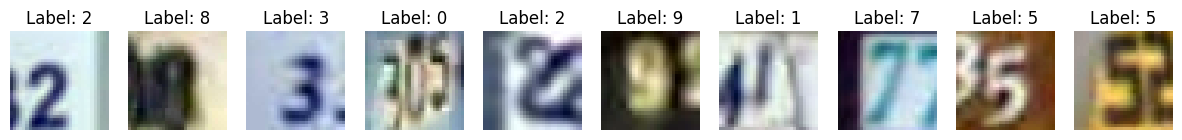

In [20]:
# Функция для отображения изображений
def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    
    for i in range(num_images):
        image, label = dataset[i]  # Получаем изображение и метку
        axes[i].imshow((image.permute(1, 2, 0) - image.min())/ (image.max() - image.min()) )  # Преобразуем для отображения
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')

    plt.show()

# Отображаем 5 изображений из тренировочного датасета
show_images(test_dataset, num_images=10)


### ViT, пример на PyTorch

In [21]:
### Пример Vision Transformer модели на PyTorch:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [32]:
from torch import nn
from einops.layers.torch import Rearrange
from torch import Tensor


class PatchEmbedding(nn.Module):
    def __init__(self, in_channels = 3, patch_size = 8, emb_size = 128):
        self.patch_size = patch_size
        super().__init__()
        self.projection = nn.Sequential(
            # break-down the image in s1 x s2 patches and flat them
            Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=patch_size, p2=patch_size),
            nn.Linear(patch_size * patch_size * in_channels, emb_size)
        )

    def forward(self, x: Tensor) -> Tensor:
        x = self.projection(x)
        return x

# Run a quick test
sample_datapoint = torch.unsqueeze(train_dataset[0][0], 0)
print("Initial shape: ", sample_datapoint.shape)
embedding = PatchEmbedding()(sample_datapoint)
print("Patches shape: ", embedding.shape)

Initial shape:  torch.Size([1, 3, 32, 32])
Patches shape:  torch.Size([1, 16, 128])


In [33]:
pe = PatchEmbedding()

Размер тензора: torch.Size([3, 32, 32])
Тип данных элементов тензора: torch.float32
Максимальный элемент: 0.20784318447113037
Минимальный элемент: -0.6235294342041016
Тип данных тензора: <class 'torch.Tensor'>


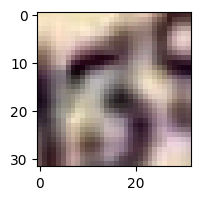

In [34]:
train_dataset[0][0].shape
image = train_dataset[0][0]
plt.figure(figsize=(2, 2))
plt.imshow((image.permute(1, 2, 0) - image.min())/ (image.max() - image.min()) )
tensor_info(image)

In [35]:
res = pe(train_dataset[0][0].unsqueeze(0))
print(res.shape)
print(res)

torch.Size([1, 16, 128])
tensor([[[-0.0644, -0.0379,  0.1581,  ..., -0.0110, -0.0358, -0.0051],
         [-0.0321,  0.0678,  0.0993,  ...,  0.0069, -0.0763,  0.0421],
         [-0.2737,  0.0293, -0.0095,  ...,  0.1682, -0.1096,  0.1804],
         ...,
         [-0.1704,  0.0683, -0.0703,  ...,  0.1899, -0.1231,  0.1876],
         [-0.1498,  0.1852, -0.2559,  ...,  0.3178, -0.1915,  0.3229],
         [ 0.0503,  0.0750,  0.1895,  ...,  0.0096, -0.0203, -0.0540]]],
       grad_fn=<ViewBackward0>)


In [37]:
from einops import rearrange

class Attention(nn.Module):
    def __init__(self, dim, n_heads, dropout):
        super().__init__()
        self.n_heads = n_heads
        self.att = torch.nn.MultiheadAttention(embed_dim=dim,
                                               num_heads=n_heads,
                                               dropout=dropout)
        self.q = torch.nn.Linear(dim, dim)
        self.k = torch.nn.Linear(dim, dim)
        self.v = torch.nn.Linear(dim, dim)

    def forward(self, x):
        q = self.q(x)
        k = self.k(x)
        v = self.v(x)
        attn_output, attn_output_weights = self.att(x, x, x)
        return attn_output

In [38]:
Attention(dim=128, n_heads=4, dropout=0.)(torch.ones((1, 5, 128))).shape

torch.Size([1, 5, 128])

In [428]:
class TransformerEncoderLayer(nn.Module):
    def __init__(self, emb_size=48, num_heads=3, mlp_ratio=4):
        super(TransformerEncoderLayer, self).__init__()
        self.norm1 = nn.LayerNorm(emb_size)
        self.attn = Attention(emb_size, num_heads)
        self.norm2 = nn.LayerNorm(emb_size)
        
        hidden_dim = emb_size * mlp_ratio
        self.mlp = nn.Sequential(
            nn.Linear(emb_size, hidden_dim),
            nn.GELU(),
            nn.Linear(hidden_dim, emb_size),
            nn.Dropout(0.1),
        )

    def forward(self, x):
        x = x + self.attn(self.norm1(x))  # Residual connection 1
        x = x + self.mlp(self.norm2(x))   # Residual connection 2
        return x


In [429]:

class ViT(nn.Module):
    def __init__(self, img_size=32, patch_size=4, in_channels=3, num_classes=10, emb_size=48, num_layers=4, num_heads=3):
        super(ViT, self).__init__()
        self.patch_embed = PatchEmbedding(img_size, patch_size, in_channels, emb_size)
        self.cls_token = nn.Parameter(torch.zeros(1, 1, emb_size))  # Токен класса
        self.pos_embed = nn.Parameter(torch.zeros(1, 1 + self.patch_embed.num_patches, emb_size))  # Позиционные эмбеддинги
        
        self.transformer_layers = nn.ModuleList([
            TransformerEncoderLayer(emb_size, num_heads)
            for _ in range(num_layers)
        ])
        
        self.norm = nn.LayerNorm(emb_size)
        self.head = nn.Linear(emb_size, num_classes)
        
    def forward(self, x):
        B = x.shape[0]
        x = self.patch_embed(x)  # Получаем эмбеддинги патчей изображений
        cls_tokens = self.cls_token.expand(B, -1, -1)  # Повторяем токен для всех батчей
        x = torch.cat((cls_tokens, x), dim=1)  # Добавляем токен класса к патчам
        x = x + self.pos_embed  # Добавляем позиционные эмбеддинги
        
        for layer in self.transformer_layers:
            x = layer(x)
            
        x = self.norm(x)
        cls_output = x[:, 0]  # Используем токен класса для предсказания
        out = self.head(cls_output)
        return out


In [430]:

# Пример использования
img_size = 32
patch_size = 4
in_channels = 3
num_classes = 10
emb_size = 48
num_layers = 4
num_heads = 3

# Создание небольшой ViT модели
model = ViT(img_size=img_size, patch_size=patch_size, in_channels=in_channels, num_classes=num_classes, emb_size=emb_size, num_layers=num_layers, num_heads=num_heads)

# Пример тензора изображения (batch_size=8, channels=3, height=32, width=32)
x = torch.randn(8, 3, 32, 32)

# Прямой проход модели
output = model(x)
print(f"Output shape: {output.shape}")  # Ожидаемый вывод: [8, 10] для классификации на 10 классов


Output shape: torch.Size([8, 10])


1. **PatchEmbedding**: Этот слой разбивает изображение на маленькие патчи (размер 4x4 в данном примере) и проецирует их в пространство с размерностью `emb_size`.
2. **Attention**: Используется механизм внимания для вычисления весов внимания и формирования нового представления признаков.
3. **TransformerEncoderLayer**: Реализует один блок трансформера с механизмом внимания и MLP (полносвязной сетью) после каждого слоя внимания.
4. **ViT**: Основная модель Vision Transformer, которая использует несколько слоев энкодера и добавляет токен класса для предсказаний.



### Параметры модели:
- `img_size=32`: Размер входного изображения 32x32.
- `patch_size=4`: Размер патча 4x4.
- `num_layers=4`: Количество слоев трансформера.
- `num_heads=3`: Количество голов внимания в multi-head self-attention.
- `emb_size=48`: Размерность эмбеддинга для каждого патча.


### Обучение модели ViT

In [435]:
# Оценка точности модели
def evaluate_model(model, test_loader, device='cpu'):
    model = model.to(device)
    model.eval()  # Устанавливаем модель в режим оценки
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total * 100
    # print(f"Accuracy: {accuracy:.2f}%")
    return accuracy

# Обучение модели
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device='cpu'):
    
    model = model.to(device)
    model.train()
    
    loss_history = []
    train_accs = []
    test_accs = []
    
    for epoch in range(num_epochs):
    
        model.train()
    
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()  # Обнуляем градиенты
            
            outputs = model(images)  # Прямой проход
            loss = criterion(outputs, labels)  # Вычисляем потерю
            
            loss.backward()  # Обратный проход
            optimizer.step()  # Обновляем параметры

            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        
        epoch_loss = running_loss / len(train_loader)
        loss_history.append(epoch_loss)
        train_acc = correct / total * 100
        train_accs.append(train_acc)
        
        test_acc = evaluate_model(model, test_loader, device=device)
        test_accs.append(test_acc)
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Test Accuracy: {test_acc:.2f}%")
    
    return loss_history, train_accs, test_accs



In [451]:
### Обучение и оценка модели
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Пример использования
img_size = 32
patch_size = 4
in_channels = 3
num_classes = 10
emb_size = 48
num_layers = 5
num_heads = 3

# Создание небольшой ViT модели
model = ViT(img_size=img_size, patch_size=patch_size, in_channels=in_channels, num_classes=num_classes, emb_size=emb_size, num_layers=num_layers, num_heads=num_heads)

num_epochs = 80

In [452]:
# Выбор критерия оптимизации и оптимизатора 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [453]:
loss_history, train_accs, test_accs = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=num_epochs, device=device)
# accuracy = evaluate_model(model, test_loader, device=device)

Epoch [1/80], Loss: 2.2533, Train Accuracy: 18.49%, Test Accuracy: 19.36%
Epoch [2/80], Loss: 2.2361, Train Accuracy: 19.03%, Test Accuracy: 19.40%
Epoch [3/80], Loss: 2.2265, Train Accuracy: 18.97%, Test Accuracy: 19.46%
Epoch [4/80], Loss: 2.2187, Train Accuracy: 19.09%, Test Accuracy: 19.74%
Epoch [5/80], Loss: 2.2132, Train Accuracy: 19.40%, Test Accuracy: 20.36%
Epoch [6/80], Loss: 2.1966, Train Accuracy: 20.34%, Test Accuracy: 22.90%
Epoch [7/80], Loss: 2.1600, Train Accuracy: 22.24%, Test Accuracy: 25.32%
Epoch [8/80], Loss: 2.0647, Train Accuracy: 26.92%, Test Accuracy: 31.26%
Epoch [9/80], Loss: 1.7889, Train Accuracy: 37.06%, Test Accuracy: 41.00%
Epoch [10/80], Loss: 1.6555, Train Accuracy: 42.68%, Test Accuracy: 44.40%
Epoch [11/80], Loss: 1.5264, Train Accuracy: 48.35%, Test Accuracy: 48.84%
Epoch [12/80], Loss: 1.3827, Train Accuracy: 53.52%, Test Accuracy: 55.08%
Epoch [13/80], Loss: 1.2923, Train Accuracy: 56.72%, Test Accuracy: 56.54%
Epoch [14/80], Loss: 1.1989, Train

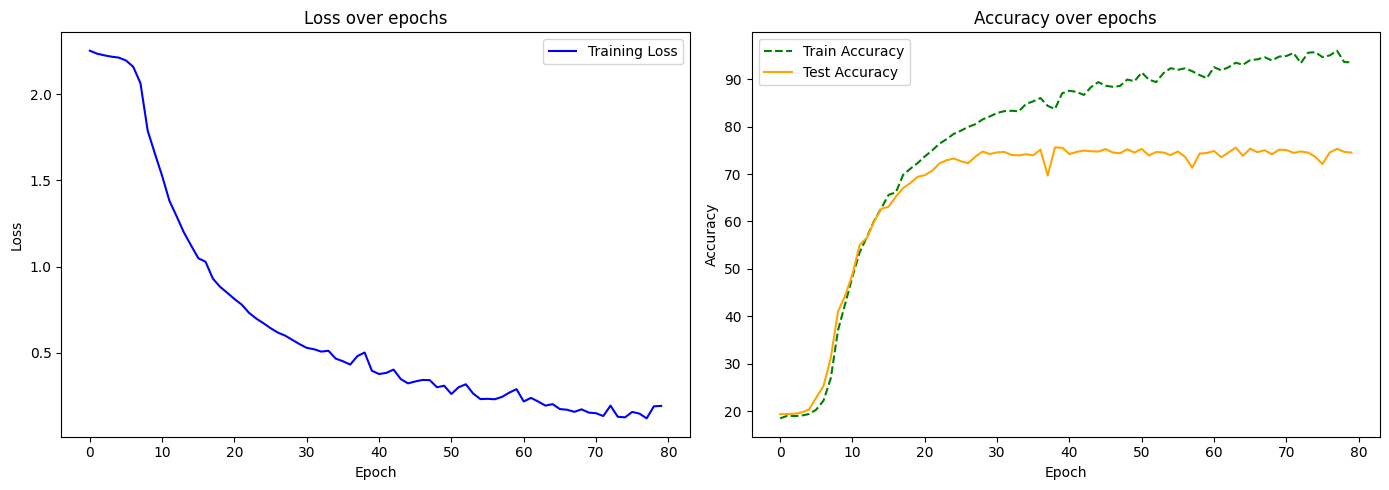

In [454]:
# Количество эпох (длина списков)
epochs = len(loss_history)

# Создание первой фигуры для графика потерь
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss_history, label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()

# Создание второй фигуры для графика точностей
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accs, label='Train Accuracy', color='green', linestyle='--')
plt.plot(range(epochs), test_accs, label='Test Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

# Показываем оба графика
plt.tight_layout()
plt.show()

In [455]:
print(f'Лучшая тестовая точность: {max(test_accs):.2f}%')

Лучшая тестовая точность: 75.60%


## * 6. Архитектуры на базе Transformer 

На данный момент библиотека `torchvision` предоставляет преимущественно предобученные модели для задач компьютерного зрения, в основном основанные на архитектурах сверточных нейронных сетей (CNN). Однако, для моделей на базе трансформеров, которые стали популярными в задачах обработки изображений, таких как **Vision Transformer (ViT)**, вам потребуется использовать другие библиотеки, например, **timm (PyTorch Image Models)**, или модели, реализованные в PyTorch, как часть официального репозитория.

Тем не менее, в `torchvision` есть несколько моделей, в которых можно рассмотреть элементы архитектур с трансформерами, например:



### 1) **Vision Transformer (ViT)**



Это одна из наиболее популярных архитектур трансформеров для задач классификации изображений, также доступна в **timm**.


In [431]:
from timm import create_model
model = create_model('vit_base_patch16_224', pretrained=True)


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]


### 2) **Swin Transformer**



Еще одна популярная архитектура на основе трансформеров, разработанная для задач классификации и сегментации изображений.


In [432]:
from timm import create_model
model = create_model('swin_base_patch4_window7_224', pretrained=True)

/home/copoka11/torch2/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]


### Пример работы с Vision Transformer (ViT) в PyTorch:


In [434]:

import torch
from timm import create_model

# Загружаем предобученную модель ViT
model = create_model('vit_base_patch16_224', pretrained=True)

# Пример тензора изображения (batch_size=1, channels=3, height=224, width=224)
input_tensor = torch.randn(1, 3, 224, 224)

# Прогон изображения через модель
output = model(input_tensor)
print(output.shape)  # Ожидаемый вывод: [1, 1000] для задачи классификации на 1000 классов (как в ImageNet)

torch.Size([1, 1000])



На данный момент в **torchvision** предобученных моделей на базе трансформеров нет, но библиотека **timm** предоставляет множество таких моделей, которые могут быть полезны для задач классификации, сегментации и детекции объектов на изображениях.